Lambda School Data Science

*Unit 4, Sprint 1, Module 4*

---

# Topic Modeling (Prepare)

# Latent Dirchilet Allocation (LDA) Models (Prepare)
<a id="#p1"></a>

## Overview
LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Follow Along

## Challenge 

# Estimating LDA Models with Gensim (Learn)
<a id="#p1"></a>

## Overview
### A Litterary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [5]:
import numpy as np
import gensim
import os
import re
import spacy

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [13]:
path = './data/austen-brontë-split'
nlp = spacy.load("en_core_web_lg")

In [24]:
import os



def tokenize(text):
    return [token for token in simple_preprocess(text) if token in STOPWORDS]

def gather_data(path_to_data): 
    data = []
    
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    data.append(tokenize(str(text)))
            
    return data

In [26]:
tokens = gather_data(path)

In [27]:
tokens[0][0:10]

['she', 'found', 'that', 'he', 'was', 'only', 'his', 'an', 'of', 'the']

In [29]:
"this is a sample string with a \n newline character".replace('\n', '')

'this is a sample string with a  newline character'

In [28]:
# Need to build dataframe
df['tokens'] = gather_data(path)

NameError: name 'df' is not defined

In [ ]:
df['tokens'].head()

## Follow Along

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [30]:
titles = [t[:-4] for t in os.listdir(path)]

In [31]:
titles[:5]

['Austen_Emma0026',
 'Austen_Emma0032',
 'CBronte_Villette0086',
 'CBronte_Jane0099',
 'CBronte_Villette0092']

In [36]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [37]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [34]:
df = pd.DataFrame(index=titles)

In [35]:
df.head()

""
Austen_Emma0026
Austen_Emma0032
CBronte_Villette0086
CBronte_Jane0099
CBronte_Villette0092


In [38]:
#

In [39]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [40]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [41]:
df.author.value_counts()

0    441
1    372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [42]:
def doc_stream(path):
    for f in os.listdir(path):
        if os.path.isdir(f) == False:
            if f[-3:] == 'txt':
                with open(os.path.join(path,f)) as t:
                    text = t.read().strip('\n')
                    tokens = tokenize(str(text))
                yield tokens

In [49]:
# Reset the generator by rerunning the cell

streaming_data = doc_stream(path)
streaming_data

<generator object doc_stream at 0x14cbedb88>

In [50]:
next(streaming_data)

['giving',
 'fair',
 'companion',
 'account',
 'yesterday',
 'party',
 'friend',
 'cole',
 'come',
 'stilton',
 'cheese',
 'north',
 'wiltshire',
 'butter',
 'cellery',
 'beet',
 'root',
 'dessert',
 'soon',
 'led',
 'better',
 'course',
 'consoling',
 'reflection',
 'thing',
 'interests',
 'love',
 'thing',
 'serve',
 'introduction',
 'near',
 'heart',
 'kept',
 'longer',
 'away',
 'walked',
 'quietly',
 'till',
 'view',
 'vicarage',
 'pales',
 'sudden',
 'resolution',
 'getting',
 'harriet',
 'house',
 'amiss',
 'boot',
 'fall',
 'arrange',
 'broke',
 'lace',
 'short',
 'dexterously',
 'throwing',
 'ditch',
 'presently',
 'obliged',
 'entreat',
 'stop',
 'acknowledged',
 'inability',
 'rights',
 'able',
 'walk',
 'home',
 'tolerable',
 'comfort',
 'lace',
 'gone',
 'know',
 'contrive',
 'troublesome',
 'companion',
 'hope',
 'ill',
 'equipped',
 'elton',
 'beg',
 'leave',
 'stop',
 'house',
 'ask',
 'housekeeper',
 'bit',
 'ribband',
 'string',
 'thing',
 'boot',
 'elton',
 'looked',

### Gensim LDA Topic Modeling

In [122]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(shops['lemmas'])

NameError: name 'shops' is not defined

In [89]:
id2word.token2id['girl']

638

In [90]:
id2word[869]

'england'

In [91]:
id2word.doc2bow(tokenize("This is a sample message Darcy England England England"))

[(869, 3), (1254, 1), (2485, 1), (16850, 1)]

In [92]:
import sys
sys.getsizeof(id2word)

56

In [93]:
len(id2word.keys())

22095

In [94]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [95]:
len(id2word.keys())

8102

In [97]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization is hapening in the doc stream f(x)
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [98]:
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1)]

In [99]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [100]:
lda.print_topics()

[(0,
  '0.009*"pounds" + 0.007*"mother" + 0.006*"sure" + 0.006*"think" + 0.006*"year" + 0.004*"rochester" + 0.004*"certainly" + 0.004*"thornfield" + 0.004*"fairfax" + 0.004*"live"'),
 (1,
  '0.008*"pelet" + 0.005*"thought" + 0.005*"like" + 0.004*"little" + 0.004*"man" + 0.004*"hunsden" + 0.004*"time" + 0.003*"having" + 0.003*"pupils" + 0.003*"crimsworth"'),
 (2,
  '0.008*"madame" + 0.006*"little" + 0.006*"like" + 0.004*"day" + 0.004*"vous" + 0.004*"thought" + 0.003*"know" + 0.003*"beck" + 0.003*"good" + 0.003*"paul"'),
 (3,
  '0.005*"night" + 0.005*"look" + 0.005*"like" + 0.004*"old" + 0.004*"est" + 0.004*"looked" + 0.003*"sir" + 0.003*"thought" + 0.003*"house" + 0.003*"hunsden"'),
 (4,
  '0.007*"little" + 0.005*"madame" + 0.005*"like" + 0.004*"thought" + 0.004*"know" + 0.004*"hand" + 0.004*"good" + 0.004*"night" + 0.003*"day" + 0.003*"dr"'),
 (5,
  '0.017*"elizabeth" + 0.013*"darcy" + 0.010*"miss" + 0.010*"bingley" + 0.010*"bennet" + 0.009*"jane" + 0.007*"know" + 0.007*"think" + 0.006

In [101]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [102]:
topics = [' '.join(t[0:5]) for t in words]

In [106]:
for id, t in enumerate(topics, start=1): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 1 ------
pounds mother sure think year

------ Topic 2 ------
pelet thought like little man

------ Topic 3 ------
madame little like day vous

------ Topic 4 ------
night look like old est

------ Topic 5 ------
little madame like thought know

------ Topic 6 ------
elizabeth darcy miss bingley bennet

------ Topic 7 ------
know jane life like long

------ Topic 8 ------
frances monsieur hunsden little english

------ Topic 9 ------
good little like emma elton

------ Topic 10 ------
sir long jane rochester little

------ Topic 11 ------
like little rochester miss room

------ Topic 12 ------
emma miss harriet thing weston

------ Topic 13 ------
jane emma little thing miss

------ Topic 14 ------
elinor marianne sister mother time

------ Topic 15 ------
monsieur henri georgiana mdlle little



## Challenge 

You will apply an LDA model to a customer review dataset to practice the fitting and estimation of LDA. 

# Interpret LDA Results (Learn)
<a id="#p3"></a>

## Overview

## Follow Along

### Topic Distance Visualization

In [107]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [108]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/mph/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.045594  0.020557       1        1  21.411991
4     -0.077665  0.055243       2        1  17.607552
11     0.141288  0.008633       3        1  16.260649
13     0.104043  0.014424       4        1  16.003170
5      0.152210  0.012563       5        1  10.043449
6     -0.013860  0.051121       6        1   6.805725
2     -0.077656  0.072671       7        1   3.625797
1     -0.033808  0.047089       8        1   2.328243
7     -0.071730  0.053932       9        1   1.555925
12     0.095364 -0.031606      10        1   1.282468
8      0.052508 -0.003886      11        1   1.224828
9      0.006459 -0.050555      12        1   0.866365
3     -0.099429 -0.027451      13        1   0.458793
0     -0.046037 -0.148617      14        1   0.262596
14    -0.086093 -0.074117      15        1   0.262457, topic_info=     Category         Freq     Term        Total  loglift  logprob
90    Default   836.000000     emma   836.000000  30.0000  30.0000
177   Default  1711.000000   little  1711.000000  29.0000  29.0000
848   Default   931.000000     jane   931.000000  28.0000  28.0000
1131  Default  1535.000000     miss  1535.000000  27.0000  27.0000
414   Default  1318.000000     like  1318.000000  26.0000  26.0000
...       ...          ...      ...          ...      ...      ...
272   Topic15     1.949850  thought  1136.644653  -0.4252  -6.0448
518   Topic15     1.881985    young   664.609802   0.0760  -6.0802
416   Topic15     1.845914     look   637.397278   0.0984  -6.0995
374   Topic15     1.834072     face   499.783630   0.3352  -6.1060
181   Topic15     1.812856   looked   696.602356  -0.0085  -6.1176

[1125 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.958442    abbey
6075      5  0.147771    abide
6075      6  0.738855    abide
1906      1  0.300438   accent
1906      2  0.225328   accent
...     ...       ...      ...
5389      2  0.525994  zoraide
5389      6  0.037571  zoraide
5389      8  0.338139  zoraide
5389     12  0.037571  zoraide
5389     13  0.037571  zoraide

[4380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 5, 12, 14, 6, 7, 3, 2, 8, 13, 9, 10, 4, 1, 15])

### Overall Model / Documents

In [109]:
lda[corpus[0]]

[(10, 0.13784632), (11, 0.7755114), (13, 0.084539585)]

In [110]:
distro = [lda[d] for d in corpus]

In [111]:
distro[0]

[(10, 0.1378547), (11, 0.7755449), (13, 0.08449767)]

In [112]:
distro = [lda[d] for d in corpus]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [113]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()

In [114]:
df.head()

,pounds mother sure think year,pelet thought like little man,madame little like day vous,night look like old est,little madame like thought know,elizabeth darcy miss bingley bennet,know jane life like long,frances monsieur hunsden little english,good little like emma elton,sir long jane rochester little,like little rochester miss room,emma miss harriet thing weston,jane emma little thing miss,elinor marianne sister mother time,monsieur henri georgiana mdlle little,author
Austen_Emma0026,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.137813,0.775380,0.0,0.084704,0.0,Austen
Austen_Emma0032,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.997455,0.0,0.000000,0.0,Austen
CBronte_Villette0086,0.0,0.0,0.0,0.0,0.215025,0.000000,0.782762,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,CBronte
CBronte_Jane0099,0.0,0.0,0.0,0.0,0.000000,0.000000,0.522735,0.0,0.0,0.0,0.473154,0.000000,0.0,0.000000,0.0,CBronte
CBronte_Villette0092,0.0,0.0,0.0,0.0,0.561910,0.027239,0.000000,0.0,0.0,0.0,0.370952,0.038246,0.0,0.000000,0.0,CBronte


In [69]:
df.groupby('author').mean()

,marianne elinor willoughby sister jennings,elinor edward sister mother lucy,like miss rochester room lady,adele rochester ladies ll shall,emma harriet miss think thing,miss jane know thing think,hunsden like st face thought,monsieur mdlle pelet reuter english,elizabeth darcy bingley bennet jane,jane sir know like rochester,graham bretton papa lucy know,like thought long night hand,madame day beck know like,dr madame thought think sir,moon adele mademoiselle liked lowood
author,,,,,,,,,,,,,,,
Austen,0.071713,0.208254,0.010205,0.000000,0.380388,0.085653,0.000099,0.000079,0.203246,0.001405,0.022159,0.011784,0.000028,0.002325,0.0000
CBronte,0.000076,0.009987,0.119843,0.007553,0.009064,0.002825,0.043100,0.038763,0.000294,0.097633,0.040166,0.581370,0.021017,0.020656,0.0048


## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow


# Selecting the Number of Topics (Learn)
<a id="#p4"></a>

## Overview

## Follow Along

In [115]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    tokens = list(doc_stream(path))
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [116]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6,
                                                        passes=40)

In [117]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [118]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-0.676902
1,0,8,-0.775092
2,0,14,-0.731926
3,0,20,-0.799729
4,0,26,-0.839708


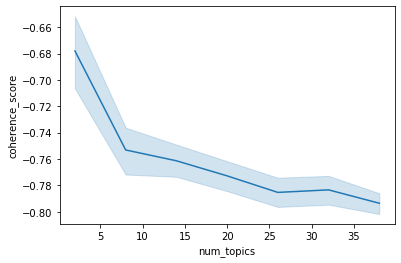

In [119]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [120]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

NameError: name 'x' is not defined

In [89]:
lda[id2word.doc2bow(tokenize("This is a sample document to score with a topic distribution."))]

[(0, 0.02226036),
 (1, 0.022260414),
 (2, 0.022260347),
 (3, 0.022260347),
 (4, 0.022260392),
 (5, 0.0222604),
 (6, 0.022260347),
 (7, 0.35487327),
 (8, 0.022260398),
 (9, 0.022260517),
 (10, 0.022260416),
 (11, 0.022260422),
 (12, 0.3557417),
 (13, 0.022260347),
 (14, 0.022260347)]

## Challenge
### *Can we see if one of the authors focus more on men than women?*

*  Use Spacy for text prepocessing
*  Extract the Named Entities from the documents using Spacy (command is fairly straight forward)
*  Create unique list of names from the authors (you'll find that there are different types of named entities not all people)
*  Label the names with genders (can you this by hand or you use the US census name lists)
*  Customize your processing to replace the proper name with your gender from the previous step's lookup table
*  Then follow the rest of the LDA flow

In [78]:
import spacy

nlp = spacy.load('en_core_web_lg')

/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/neural/train.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from .optimizers import Adam, linear_decay
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable
/Users/jonathansokoll/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/thinc/check.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, Sized, Iterable, Callable


In [79]:
test = "Ned asked me a question about England today."

In [80]:
doc = nlp(test)

for token in doc:
    print(token.text, token.lemma_, token.pos_)

Ned Ned PROPN
asked ask VERB
me -PRON- PRON
a a DET
question question NOUN
about about ADP
England England PROPN
today today NOUN
. . PUNCT


In [81]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Ned PERSON
England GPE
today DATE


In [82]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            yield text

def get_people(docstream):
    
    ppl = []
    
    for d in docstream:
        
        doc = nlp(d)
        
        for ent in doc.ents:
            
            if ent.label_ == "PERSON":
                ppl.append(ent.lemma_)
                
    return set(ppl)

In [129]:
people = get_people(doc_stream(path))

In [126]:
doc = nlp(next(doc_stream(path)))

In [128]:
doc.ents[0].lemma_

'yesterday'

# Sources

### *References*
* [Andrew Ng et al paper on LDA](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)
* On [Coherence](https://pdfs.semanticscholar.org/1521/8d9c029cbb903ae7c729b2c644c24994c201.pdf)

### *Resources*

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)